C:\Users\shree\0last\data
#--- words.txt ---------------------------------------------------------------#

#

# iam database word information

#

# format: a01-000u-00-00 ok 154 1 408 768 27 51 AT A

#

#     a01-000u-00-00  -> word id for line 00 in form a01-000u

#     ok              -> result of word segmentation

#                            ok: word was correctly

#                            er: segmentation of word can be bad

#

#     154             -> graylevel to binarize the line containing this word

#     1               -> number of components for this word

#     408 768 27 51   -> bounding box around this word in x,y,w,h format

#     AT              -> the grammatical tag for this word, see the

#                        file tagset.txt for an explanation

#     A               -> the transcription for this word

#

a01-000u-00-00 ok 154 408 768 27 51 AT A

a01-000u-00-01 ok 154 507 766 213 48 NN MOVE

a01-000u-00-02 ok 154 796 764 70 50 TO to

a01-000u-00-03 ok 154 9

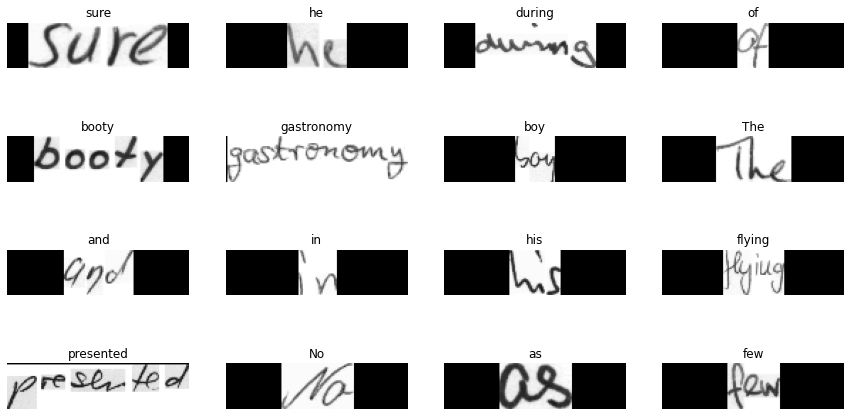

Model: "digitizer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 32, 32)  320         ['image[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 128, 32, 128  36992       ['Conv1[0][0]']                  
                                )                                                                 
                                                                                          

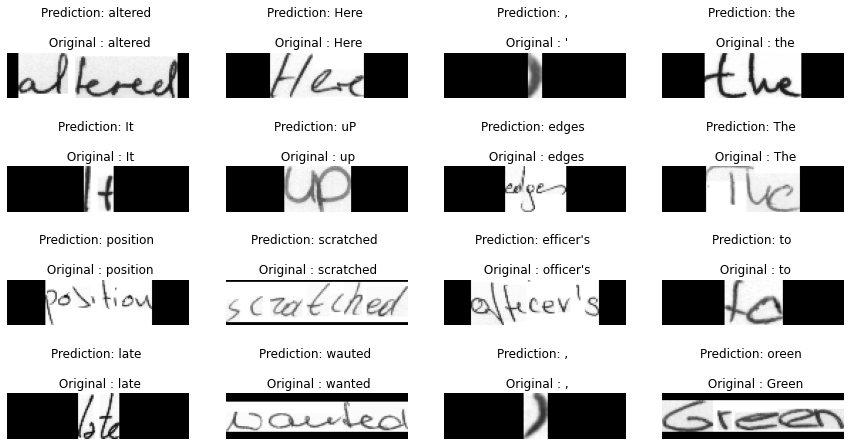

In [1]:
%run pyfile.ipynb

In [2]:
#importing all the necessary libraries 
import streamlit as st
from streamlit_option_menu import option_menu
import streamlit.components.v1 as html
from  PIL import Image
import numpy as np
import cv2
import pandas as pd
from st_aggrid import AgGrid
import plotly.express as px
import io

In [3]:
%%writefile app.py

import tensorflow as tf
import keras 
from PIL import Image
import io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Define a function to make predictions with the model


'''def prediction(image):

    
    custom_ds = prepare_dataset_custom([image])
    
    for batch in custom_ds.take(1):
        MAX_LABEL_LENGTH=21
        batch_images = tf.stack(batch)
        batch_labels = tf.zeros([batch_images.shape[0], MAX_LABEL_LENGTH])
    
        print("len is : ",len(batch))
        print("batch img shape: ",batch_images[0].shape)
    
        _, ax = plt.subplots(1, 1, figsize=(15, 8))

        preds = new_model.predict([batch_images, batch_labels])
        pred_texts = decode_batch_predictions(preds)
    
    
        print(pred_texts)

        for i in range(1):
            img = batch_images[i]
            img = tf.image.flip_left_right(img)
            img = tf.transpose(img, perm=[1, 0, 2])
            img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
            img = img[:, :, 0]

            title = f"Prediction: {pred_texts[i]}"
            ax[i].imshow(img, cmap="gray")
            ax[i].set_title(title)
            ax[i].axis("off")

    return plt
     '''


def read_image_file(uploaded_file):
    # Read the file contents
    contents = uploaded_file.read()

    # Decode the file contents to a tensor with shape (height, width, channels)
    image = tf.image.decode_image(contents)

    # Convert the tensor to a NumPy array and add a channel dimension
    image_array = np.expand_dims(image.numpy(), axis=-1)

    # Resize the array to the expected shape
    image_array = tf.image.resize(image_array, (128, 32)).numpy()

    return image_array

# Define the Streamlit app
def main():
    # Create a file uploader
    uploaded_file = st.file_uploader("Choose an image of the prescription", type=['jpg', 'jpeg', 'png'])
    
    # If the user uploaded a file
    if uploaded_file is not None:
        # Read the image file
        image = read_image_file(uploaded_file)
        
        # Make a prediction with the model
        final_answer = prediction(image)
        
        # Display the prediction
        st.pyplot(final_answer)

if __name__ == '__main__':
    main()

Overwriting app.py


In [4]:
!streamlit run app.py 

^C
